In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import ast
from wordcloud import WordCloud



## Cargamos el dataset

In [2]:
df=pd.read_csv('proceso_etl_terminado.csv')

## Revisamos las primeras filas

In [4]:
print(df.head())

       budget     id original_language  \
0  30000000.0    862                en   
1  65000000.0   8844                en   
2         0.0  15602                en   
3  16000000.0  31357                en   
4         0.0  11862                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   1995-12-22   
4  Just when George Banks has recovered from his ...    8.387519   1995-02-10   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          0.0    101.0  Released   
3   81452156.0    127.0  Released   
4   76578911.0    106.0  Released   

                                     

## Buscamos mas información

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 45451 non-null  float64
 1   id                     45451 non-null  int64  
 2   original_language      45440 non-null  object 
 3   overview               44510 non-null  object 
 4   popularity             45451 non-null  float64
 5   release_date           45451 non-null  object 
 6   revenue                45451 non-null  float64
 7   runtime                45205 non-null  float64
 8   status                 45371 non-null  object 
 9   tagline                20425 non-null  object 
 10  title                  45451 non-null  object 
 11  vote_average           45451 non-null  float64
 12  vote_count             45451 non-null  float64
 13  name_to_collection     4497 non-null   object 
 14  name_genres            45451 non-null  object 
 15  no

## Verificamos las estadísticas descritivas de nuestro dataset


In [6]:
print(df.describe())

             budget             id    popularity       revenue       runtime  \
count  4.545100e+04   45451.000000  45451.000000  4.545100e+04  45205.000000   
mean   4.231294e+06  107984.599745      2.926887  1.121930e+07     94.181905   
std    1.742942e+07  112111.336735      6.006458  6.433984e+07     38.329504   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26367.500000      0.389095  0.000000e+00     85.000000   
50%    0.000000e+00   59871.000000      1.131386  0.000000e+00     95.000000   
75%    0.000000e+00  156327.500000      3.694370  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000   

       vote_average    vote_count  release_year        return  
count  45451.000000  45451.000000  45451.000000  4.545100e+04  
mean       5.624085    109.989703   1991.882027  6.589542e+02  
std        1.915424    491.352336     24.057726  7.463165e+04  
min        0.000000    

## Matriz de correlación 

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix)


                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.101366    0.449507  0.768665  0.134818   
id           -0.101366  1.000000   -0.082434 -0.071012 -0.119166   
popularity    0.449507 -0.082434    1.000000  0.506067  0.129668   
revenue       0.768665 -0.071012    0.506067  1.000000  0.103884   
runtime       0.134818 -0.119166    0.129668  0.103884  1.000000   
vote_average  0.073120 -0.165146    0.153814  0.083738  0.156343   
vote_count    0.676501 -0.064421    0.559846  0.811993  0.113477   
release_year  0.131680  0.286546    0.131783  0.088311  0.078940   
return       -0.002135 -0.006751    0.003213  0.000793  0.000890   

              vote_average  vote_count  release_year    return  
budget            0.073120    0.676501      0.131680 -0.002135  
id               -0.165146   -0.064421      0.286546 -0.006751  
popularity        0.153814    0.559846      0.131783  0.003213  
revenue           0.083738    0.811993      0.088311  0.000

C:\Users\agust_5hrd3hq\AppData\Local\Temp\ipykernel_2872\2098062175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


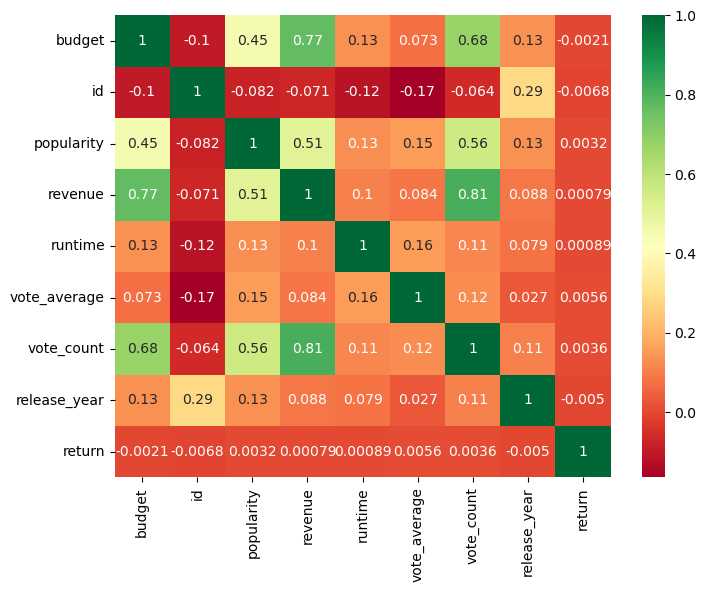

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.show()

## Cantidad de peliculas por géneros

In [54]:
df.shape


(45451, 21)

In [55]:
data_type = type(df.loc[0, 'name_genres'])
print(data_type)


<class 'list'>


In [48]:

# Expandimos las listas de la columna name_genres
nombres_expandidos = df['name_genres'].explode()
# Contamos la frecuencia de cada valor en la columna 'genres_desanidado'
cantidad_generos = nombres_expandidos.value_counts()
# Eliminamos los géneros que solo aparecen una vez
cantidad_generos = cantidad_generos[cantidad_generos>1]

In [51]:
#Vamos a ordenar de forma ascendente los generos por cantidad de peliculas
cantidad_generos=cantidad_generos.sort_values()

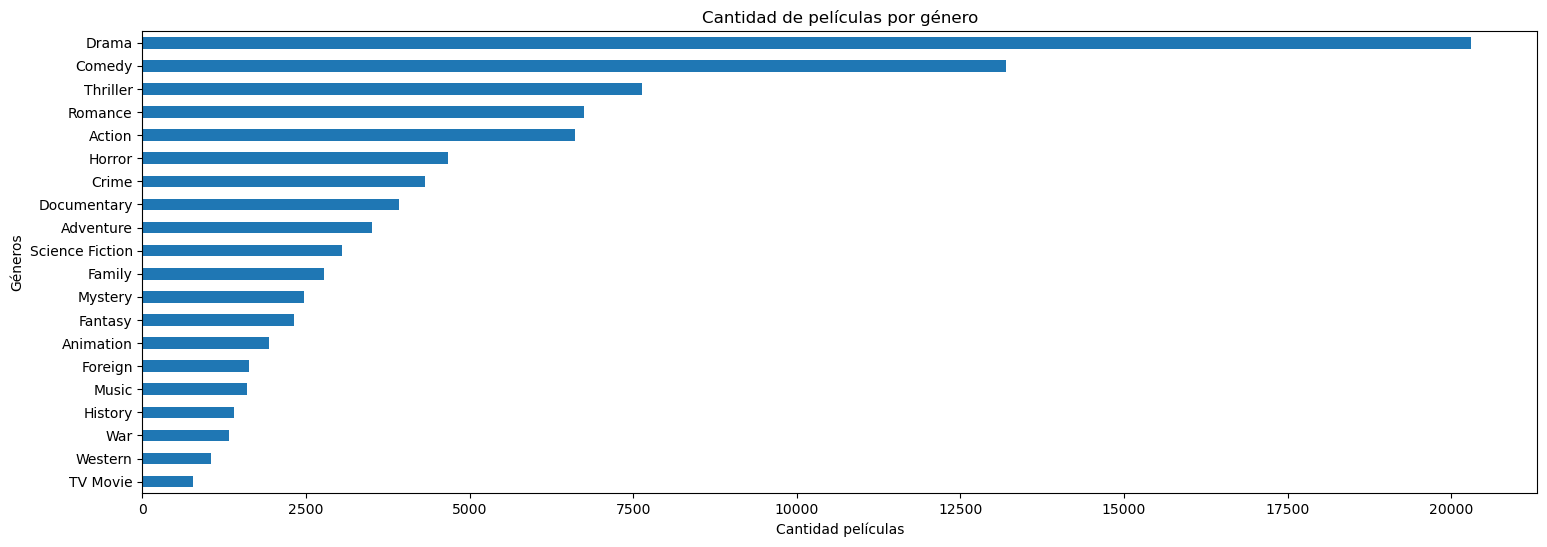

In [52]:
#vamos a crear un gráfico de barras horizontales
plt.figure(figsize=(18,6))
cantidad_generos.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad películas')
plt.ylabel('Géneros')
plt.show()

## Idomas mas comunes en las películas

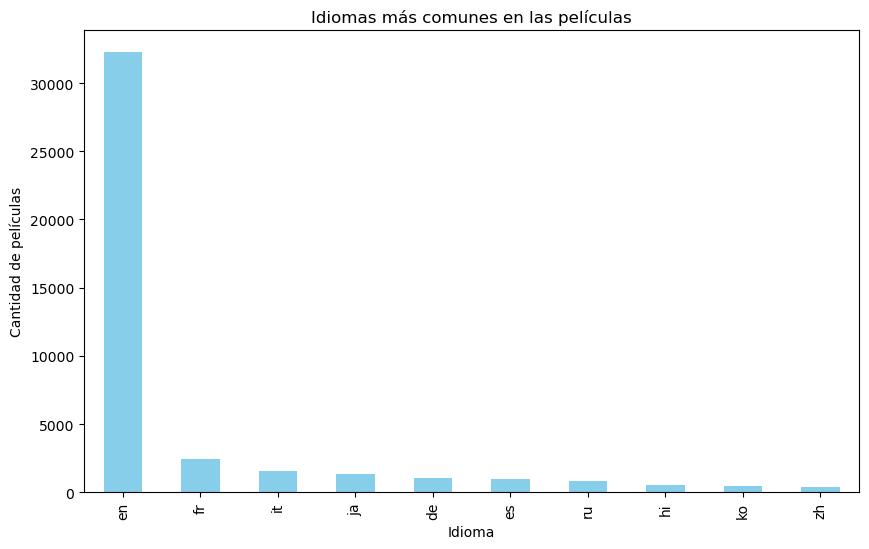

In [83]:
# Contar la cantidad de películas por idioma
top_languages = df['original_language'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Idioma')
plt.ylabel('Cantidad de películas')
plt.title('Idiomas más comunes en las películas')

# Mostrar el gráfico
plt.show()


## Cantidad de peliculas producida por año

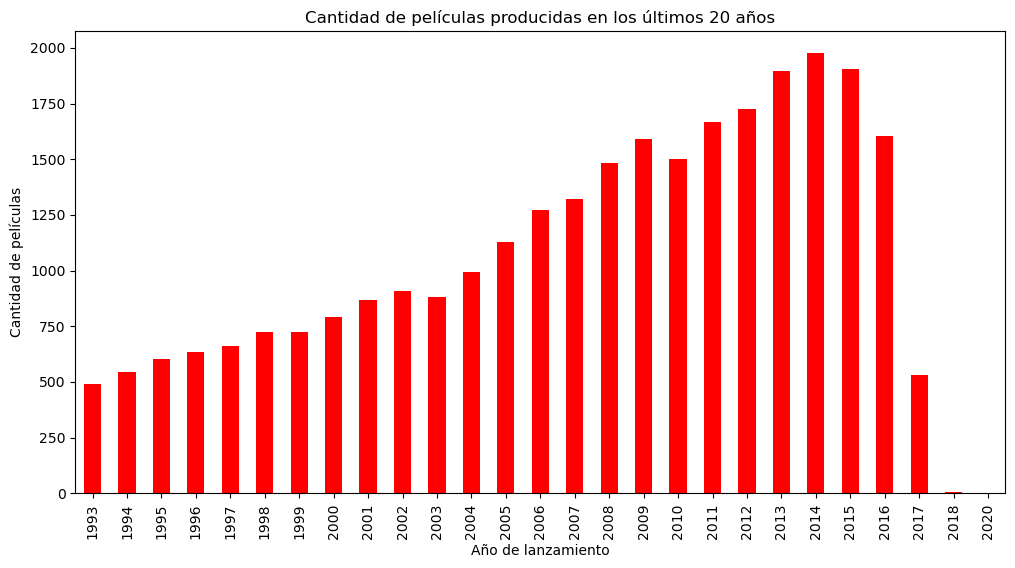

In [82]:
# Obtener el año actual
current_year = 2023

# Filtrar las películas de los últimos 20 años
recent_movies = df[df['release_year'] >= current_year - 30]

# Contar la cantidad de películas por año
movies_per_year = recent_movies['release_year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='red')

# Agregar etiquetas y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas producidas en los últimos 20 años')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


## Distribución de las calificaciones promedio de las peliculas

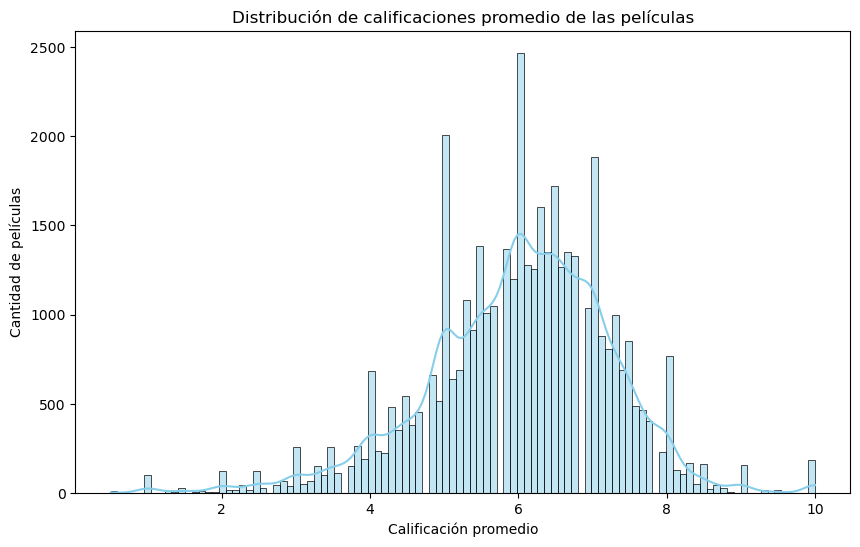

In [84]:
# Filtrar las películas con calificaciones promedio válidas
valid_ratings = df[df['vote_average'] > 0]

# Crear el gráfico de distribución de calificaciones promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=valid_ratings, x='vote_average', kde=True, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Calificación promedio')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de calificaciones promedio de las películas')

# Mostrar el gráfico
plt.show()


## Nube de palabas

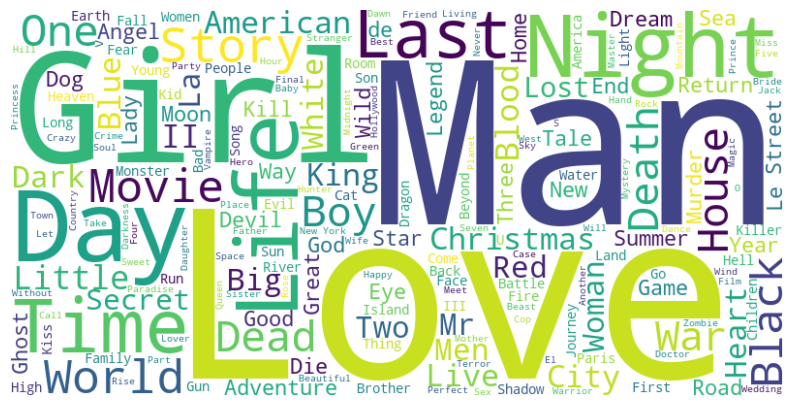

In [102]:
# Concatenar todos los títulos en una sola cadena de texto
text = ' '.join(df['title'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el gráfico de nubes de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Modelo MACHINE LEARNIG


In [187]:
from sklearn.metrics.pairwise import cosine_similarity

def recomendacion(titulo):
    # Obtener la fila correspondiente al título de la película ingresada
    pelicula = df[df['title'] == titulo]

    # Obtener las características de género de la película de interés
    generos_pelicula = pelicula['name_genres'].iloc[0].split(',')

    # Obtener la matriz de características de género de todas las películas
    generos = df['name_genres'].str.get_dummies(',')

    # Obtener la matriz de puntuaciones de todas las películas
    puntuaciones = df[['vote_average', 'vote_count']].values

    # Combinar las matrices de género y puntuaciones
    caracteristicas = pd.concat([generos, pd.DataFrame(puntuaciones, columns=['vote_average', 'vote_count'])], axis=1)

    # Calcular la similitud de coseno entre la película ingresada y todas las demás películas basada en características
    similitudes = cosine_similarity(caracteristicas.loc[pelicula.index], caracteristicas)

    # Obtener los índices de las películas más similares (excluyendo la película ingresada)
    indices_similares = similitudes.argsort()[0][::-1][1:]

    # Obtener los títulos de las 5 películas más similares
    peliculas_similares = df.iloc[indices_similares][:5]['title'].tolist()

    return {'lista recomendada': peliculas_similares}

# Ejemplo de uso
titulo_pelicula = 'Toy Story'  # Reemplaza 'Avatar' con el título de la película que deseas obtener recomendaciones
recomendaciones = recomendacion(titulo_pelicula)
print(recomendaciones)

{'lista recomendada': ['Despicable Me 2', 'Monsters, Inc.', 'Frozen', 'WALL·E', 'Finding Nemo']}
